

> **Defining parameters of rocks (specifically for the granite)**



In [ ]:
import numpy as np
import math
import cmath
import pandas as pd
import sympy
from sympy import mellin_transform, exp
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.special as special
from copy import copy, deepcopy
from sympy import *
from matplotlib import pyplot as plt

In [ ]:
while True:
  try:
    selectionBVP = int(input("Choose BVP: "))
    if(selectionBVP == 1):
      alpha = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
      beta = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
      break;
    elif(selectionBVP == 2):
      alpha = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
      beta = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
      break;
    elif(selectionBVP == 3):
      alpha = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 0]])
      beta = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 1]])
      break;
    elif(selectionBVP == 4):
      alpha = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 1]])
      beta = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 0]])
      break;
    else:
      print("You have to choose in range 1 to 4. Try again ...")
  except ValueError:
    print("Oops!  That was no valid number.  Try again...")
    continue

Choose BVP: 1


In [ ]:
rockParameters = pd.DataFrame({
        'granite': [2.61, 4.02, 0.26, 2.4, 946, 0.8, 5600, 2750, 1.974, 4.24, 13.3, 1.7, 9.27],
        'sandstone': [2.69, 4.13, 0.09, 1.66, 972, 0.64, 3272, 1293, 0.45, 1.98, 2.5, 0.44, 9.86],
        'silicified shale':[2.72, 5.2, 0.21, 2.4, 887, 0.53, 3243, 1808, 0.89, 1.08, 2.65, 0.32, 11.27],
        'silistone':[2.69, 3.87, 0.29, 1.49, 880, 0.5, 2390, 1204, 0.39, 0.756, 1.5, 0.29, 10.28],
        'shales':[2.77, 5.25, 0.15, 2.46, 866, 0.68, 4493, 2879, 2.296, 1, 5.2, 0.6, 9.46],
          }, index=['Density', 'Youngs modulus', 'Poisson ratio', 'Thermal conductivity', 'Heat capacity', 'Thermal expansion', 'Velocity of p waves', 'Velosity of s waves', 'Shear modulus', 'Lame parameter', 'Thermoelastic parameter gamma', 'Thermal expansion eta', 'Thermal conductivity kappa'])

In [ ]:
rockParameters

,granite,sandstone,silicified shale,silistone,shales
Density,2.610,2.69,2.72,2.690,2.770
Youngs modulus,4.020,4.13,5.20,3.870,5.250
Poisson ratio,0.260,0.09,0.21,0.290,0.150
Thermal conductivity,2.400,1.66,2.40,1.490,2.460
Heat capacity,946.000,972.00,887.00,880.000,866.000
Thermal expansion,0.800,0.64,0.53,0.500,0.680
Velocity of p waves,5600.000,3272.00,3243.00,2390.000,4493.000
Velosity of s waves,2750.000,1293.00,1808.00,1204.000,2879.000
Shear modulus,1.974,0.45,0.89,0.390,2.296
Lame parameter,4.240,1.98,1.08,0.756,1.000


In [ ]:
column_names_rocks = list(rockParameters.columns)
column_names_rocks = [item.lower() for item in column_names_rocks]
while True:
  try:
    selectionRocks = input("Choose parameters of rocks: ")
    if selectionRocks.lower() in (item.lower() for item in column_names_rocks):
      sigmaPar = rockParameters.loc['Density', selectionRocks.lower()] #density of material
      youngsMod = rockParameters.loc['Youngs modulus', selectionRocks.lower()] #Young's modulus
      nuPar = rockParameters.loc['Poisson ratio', selectionRocks.lower()] #Poisson's ratio
      lambdaTPar = rockParameters.loc['Thermal conductivity', selectionRocks.lower()] #thermal conductivity
      CTPar = rockParameters.loc['Heat capacity', selectionRocks.lower()] #specific heat capacity
      alphaTPar = rockParameters.loc['Thermal expansion', selectionRocks.lower()] #thermal expansion coefficient
      velPPar = rockParameters.loc['Velocity of p waves', selectionRocks.lower()] #velocity of (compressional)p waves
      velSPar = rockParameters.loc['Velosity of s waves', selectionRocks.lower()] #velocity of shear waves
      muPar = rockParameters.loc['Shear modulus', selectionRocks.lower()] #shear modulus
      lambdaPar = rockParameters.loc['Lame parameter', selectionRocks.lower()] #the first Lame parameter
      gammaPar = rockParameters.loc['Thermoelastic parameter gamma', selectionRocks.lower()] #Gruneisen parameter
      etaPar = rockParameters.loc['Thermal expansion eta', selectionRocks.lower()] #coefficient of thermal expansion
      kappaPar = rockParameters.loc['Thermal conductivity kappa', selectionRocks.lower()] #thermal conductivity
      gammaBarPar = 0.94
      print("Successfully initialized parameters of ", selectionRocks, "!")
      break;
    elif not selectionRocks.isalpha():
      print("Oops!  That was no valid input.  Try again...")
      continue
    else:
      print("sorry but we dont have this rock in our base... But you can apply your own values: ")
      lambdaPar = input("The first Lame parameter lambda ") #the first Lame parameter
      youngsMod = input("Young's modeulus ") #Young's modulus
      nuPar = input("Poisson's ration nu ") #Poisson's ratio
      gammaPar = input("Thermoelastic parameter gamma ") #Gruneisen parameter
      etaPar = input("Coefficient of thermal expansion eta ") #coefficient of thermal expansion
      kappaPar = input("Thermal conductivity kappa ") #thermal conductivity
      muPar = input("Shear modulus mu ") #shear modulus
      velSPar = input("Velocity of shear waves ") #velocity of shear waves
      velPPar = input("Velocity of P-waves ") #velocity of (compressional)p waves
      alphaTPar = input("Theraml expansion coefficient alpha ") #thermal expansion coefficient
      CTPar = input("Scpecific heat capacity ") #specific heat capacity
      lambdaTPar = input("Thermal conductivity of lambda ") #thermal conductivity
      sigmaPar = input("Density of material ") #density of material
      gammaBarPar = 0.94
      if lambdaPar.isdigit() and youngsMod.isdigit() and nuPar.isdigit() and nuPar.isdigit() and gammaPar.isdigit() and etaPar.isdigit() and kappaPar.isdigit() and muPar.isdigit() and velSPar.isdigit() and velPPar.isdigit() and alphaTPar.isdigit() and CTPar.isdigit() and lambdaTPar.isdigit() and sigmaPar.isDigit():
        rockParameters[selectionRocks] = [float(sigmaPar), float(youngsMod), float(nuPar), float(lambdaTPar), float(CTPar),
                                            float(alphaTPar), float(velPPar), float(velSPar), float(muPar), float(lambdaPar),
                                            float(gammaPar), float(etaPar), float(kappaPar)]
        print("Successfully initialized parameters of ", selectionRocks, "!")
        break;
      else:
        print("Oops!  That was no valid input.  Try again...")
        continue
  except ValueError:
    print("Oops!  That was no valid input.  Try again...")
    continue

Choose parameters of rocks: granite
Successfully initialized parameters of  granite !



$\varepsilon = \dfrac{\gamma \eta \kappa}{\lambda + 2\eta}$

To represent material constants that depend on the elastic properties of the material being studied

$c1^2 = \frac{λ + 2μ}{\rho} \\
c2^2 = \frac{μ}{\rho}$

In [ ]:
epsilonPar = (gammaPar* etaPar*kappaPar)/(lambdaPar + 2* etaPar)
print("epsilon", epsilonPar)
cPar_1 = (lambdaPar + 2*muPar)/sigmaPar
cPar_2 = muPar/sigmaPar
print("the propagation velocities of dilational shear waves")
print(cPar_1, cPar_2)

epsilon 27.4338612565445
the propagation velocities of dilational shear waves
3.137164750957855 0.7563218390804598


In [ ]:
xiPar = 1
xiBarPar = xiPar/sigmaPar

Define BVP, this code specifically solves it for BVP1 $ \alpha_{11}=\alpha_{22}=\alpha_{33}=1;$ \\
All the other corresponding variables equal to $0$.

In [ ]:
n = np.array([1, 0, 0]) #normal n(x) on the free surface

In [ ]:
def Kronecker(i,j): #Kronecker's delta
  if i==j:
    return 1
  else:
    return 0

\begin{equation}
    \begin{gathered}
        D_{i z}\left(n, \partial_1, \partial_2\right)=\lambda n_i \delta_{j z} \partial_j-\gamma n_i \delta_{3 z}+\mu n_j \delta_{z i} \partial_j+\mu n_z \partial_i
    \end{gathered}
\end{equation}

In [ ]:
def D_iz():
    Diz = np.zeros((3, 3))
    for i in range(3):
        for z in range(3):
          Diz[i, z] += muPar * n[z]
          Diz[i, z] += -gammaPar * n[i] * Kronecker(2, z)
          for j in range(3):
              Diz[i, z] += lambdaPar * n[i] * Kronecker(j, z)
              Diz[i, z] += muPar * n[j] * Kronecker(z, i)
    return Diz

In [ ]:
D_iz()

array([[ 8.188,  4.24 , -9.06 ],
       [ 1.974,  1.974,  0.   ],
       [ 1.974,  0.   ,  1.974]])

In [ ]:
def B():
  B_matrix = np.zeros((3, 3))
  for z in range(3):
      for j in range(3):
          B_matrix[z,j] = alpha[z,j] + alpha[z,2] * Kronecker(j,2) + beta[z,2] * Kronecker(j,2)
          for l in range(3):
              B_matrix[z,j] += beta[z,l] * D_iz()[l, j]
  return B_matrix

In [ ]:
B()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.]])

Let's find the roots of equation

\begin{equation}
    k_1(\xi, \omega)=\pm \sqrt{\xi^2-\frac{\omega^2}{c_2^2}}
\end{equation}

\begin{equation}
\begin{aligned}
 k_2^2=\xi^2-\frac{1}{2}\left[\frac{\omega^2}{c_1^2}+\frac{i \omega(1+\varepsilon)}{\kappa}+\sqrt{\left(\frac{\omega^2}{c_1^2}+\frac{i \omega(1+\varepsilon)}{\kappa}\right)^2-\frac{4 i \omega^3}{\kappa c_1^2}}\right]
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
k_3^2=\xi^2-\frac{1}{2}\left[\frac{\omega^2}{c_1^2}+\frac{i \omega(1+\varepsilon)}{\kappa}-\sqrt{\left(\frac{\omega^2}{c_1^2}+\frac{i \omega(1+\varepsilon)}{\kappa}\right)^2-\frac{4 i \omega^3}{\kappa c_1^2}}\right]
\end{aligned}
\end{equation}

In [ ]:
def root_K1(xiPar, omegaPar):
  rootK1_sq = math.pow(xiPar, 2) - (math.pow(omegaPar, 2)/cPar_2)
  return rootK1_sq

def root_K2(xiPar, omegaPar):
  temp1 = omegaPar**2/cPar_1 + 1j*omegaPar*(1+epsilonPar)/kappaPar
  temp2 = (omegaPar**2/cPar_1 + 1j*omegaPar*(1+epsilonPar)/kappaPar)**2 - 4j*omegaPar**3/(kappaPar*cPar_1)
  rootK2_sq = xiPar**2 - 0.5*(temp1 + np.sqrt(temp2))
  return rootK2_sq

def root_K3(xiPar, omegaPar):
  temp1 = omegaPar**2/cPar_1 + 1j*omegaPar*(1+epsilonPar)/kappaPar
  temp2 = (omegaPar**2/cPar_1 + 1j*omegaPar*(1+epsilonPar)/kappaPar)**2 - 4j*omegaPar**3/(kappaPar*cPar_1)
  rootK3_sq = xiPar**2 - 0.5*(temp1 - np.sqrt(temp2))
  return rootK3_sq


> Let's plot a change in root K according to change in $\omega$



In [ ]:
def plottingK1(xiPar):
  omegaChange = np.linspace(1, 11, 10)
  KRoot1Change = np.zeros((10), dtype = "complex")
  for i in range(len(omegaChange)):
    KRoot1Change[i] = root_K1(xiPar, omegaChange[i])
  fig, ax = plt.subplots(figsize=(6, 6))
  ax.plot(np.real(KRoot1Change), np.imag(KRoot1Change), '-.r*')
  ax.set_xlabel('Real part')
  ax.set_ylabel('Imaginary part')
  ax.set_title('root_K1(xiPar={}, omega)'.format(xiPar))
  plt.savefig('plot.png')
  plt.show()

def plottingK2(xiPar):
  omegaChange = np.linspace(1, 11, 10)
  KRoot2Change = np.zeros((10), dtype = "complex")
  for i in range(len(omegaChange)):
    KRoot2Change[i] = root_K2(xiPar, omegaChange[i])
  fig, ax = plt.subplots(figsize=(6, 6))
  ax.plot(np.real(KRoot2Change), np.imag(KRoot2Change), '-.r*')
  ax.set_xlabel('Real part')
  ax.set_ylabel('Imaginary part')
  ax.set_title('root_K2(xiPar={}, omega)'.format(xiPar))
  plt.savefig('plot.png')
  plt.show()

def plottingK3(xiPar):
  omegaChangeRoot3 = np.linspace(1, 11, 10)
  KRoot3Change = np.zeros((10), dtype = "complex")
  for i in range(len(omegaChangeRoot3)):
    KRoot3Change[i] = root_K3(xiPar, omegaChangeRoot3[i])
  fig, ax = plt.subplots(figsize=(6, 4))
  ax.plot(np.real(KRoot3Change), np.imag(KRoot3Change), '-.r*')
  ax.set_xlabel('Real part')
  ax.set_ylabel('Imaginary part')
  ax.set_title('root_K3(xiPar={}, omega)'.format(xiPar))
  plt.savefig('plot.png')
  plt.show()

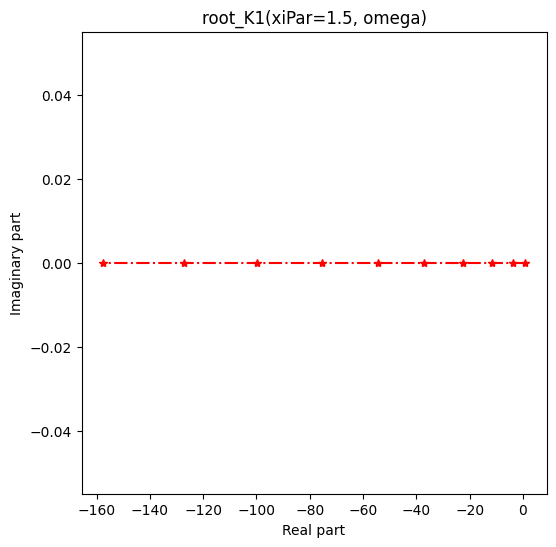

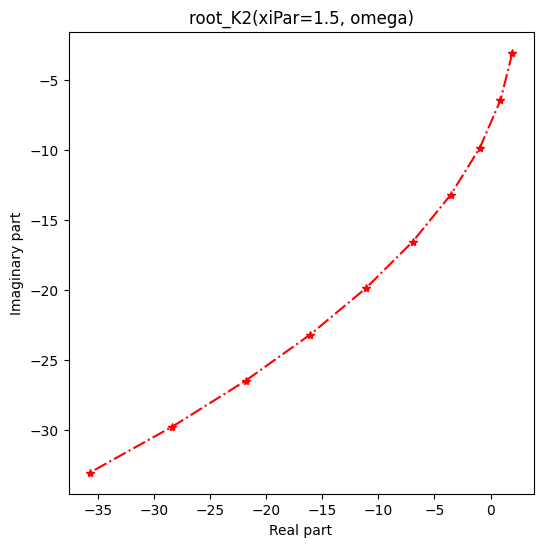

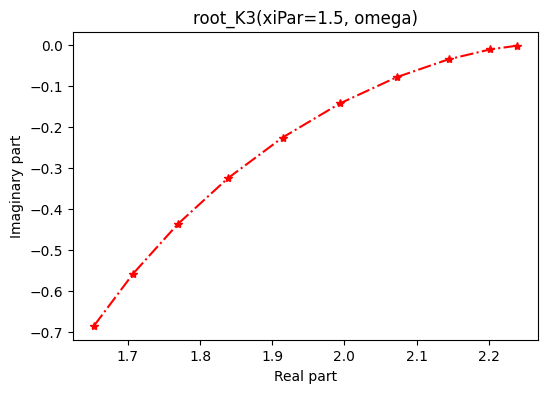

In [ ]:
plottingK1(1.5)
plottingK2(1.5)
plottingK3(1.5)

In [ ]:
def kRootList(xiPar, omegaChange):
  kRootList = np.array([root_K1(xiPar, omegaChange), root_K2(xiPar, omegaChange), root_K3(xiPar, omegaChange)])
  return kRootList
kRootList(2, 1000)

array([-1.32218445e+06+0.00000000e+00j, -3.18755160e+05-3.06729895e+03j,
        4.00000000e+00+2.27373675e-13j])

\begin{equation*}
\begin{aligned}
& v_1^m\left(k_j(\xi, \omega)\right)=v_{1(j)}^m(\xi, \omega)=\frac{\Delta_{j 1}(\xi, \omega)}{\Delta_j(\xi, \omega)}, \\
& v_2^m\left(k_j(\xi, \omega)\right)=v_{2(j)}^m(\xi, \omega)=\frac{\Delta_{j 2}(\xi, \omega)}{\Delta_j(\xi, \omega)}, \\
& \Delta_j(\xi, \omega)=\operatorname{det}\left\{\begin{array}{rr}
c_1^2 k_j^2+\omega^2-c_2^2 \xi^2, & i\left(c_1^2-c_2^2\right) \xi k_j \\
i\left(c_1^2-c_2^2\right) \xi k_j, & \omega^2-c_1^2 \xi^2+c_2^2 k_j^2
\end{array}\right\}, \\
& \Delta_{j 1}(\xi, \omega)=\operatorname{det}\left\{\begin{array}{rr}
\tilde{\gamma} k_j, & i\left(c_1^2-c_2^2\right) \xi k_j \\
i \tilde{\gamma} \xi, & \omega^2-c_1^2 \xi^2+c_2^2 k_j^2
\end{array}\right\}, \\
& \Delta_{j 2}(\xi, \omega)=\operatorname{det}\left\{\begin{aligned}
c_1^2 k_j^2+\omega^2-c_2^2 \xi^2, & \tilde{\gamma} k_j \\
i\left(c_1^2-c_2^2\right) \xi k_j, & i \tilde{\gamma} \xi
\end{aligned}\right\} . \\
&
\end{aligned}
\end{equation*}


In [ ]:
def vListTotal(xiPar, omegaChange):
  vListTotal = np.zeros((3, 3),dtype = 'complex_')
  v1Element = np.zeros((3),dtype = 'complex_')
  v2Element = np.zeros((3),dtype = 'complex_')
  v3Element = np.array([1, 1, 1], dtype='complex_')
  DeltaMatrixDetJList = np.zeros((3),dtype = 'complex_')
  DeltaMatrixDetJ1List = np.zeros((3),dtype = 'complex_')
  DeltaMatrixDetJ2List = np.zeros((3),dtype = 'complex_')
  for j in range(3):
   DeltaMatrixJ = np.array([[cPar_1 * kRootList(xiPar, omegaChange)[j]
                              + omegaChange**2 - cPar_2 * xiPar**2, 1j
                              * (cPar_1 - cPar_2) * xiPar
                              * np.sqrt(kRootList(xiPar, omegaChange)[j])],
                              [1j * (cPar_1 - cPar_2) * xiPar
                               * np.sqrt(kRootList(xiPar, omegaChange)[j]),
                               omegaChange**2 - cPar_1 * xiPar**2 + cPar_2
                               * kRootList(xiPar, omegaChange)[j]]])
   DeltaMatrixJ1 = np.array([[gammaBarPar *
                               np.sqrt(kRootList(xiPar, omegaChange)[j]),
                               1j * (cPar_1 - cPar_2) * xiPar *
                               np.sqrt(kRootList(xiPar, omegaChange)[j])],
                              [1j * gammaBarPar * xiPar, omegaChange**2
                               - cPar_1*xiPar**2
                               + cPar_2*kRootList(xiPar, omegaChange)[j]]])
   DeltaMatrixJ2 = np.array([[cPar_1 * kRootList(xiPar, omegaChange)[j]
                               + omegaChange**2 - cPar_2*xiPar**2, gammaBarPar
                               * np.sqrt(kRootList(xiPar, omegaChange)[j])],
                              [1j * (cPar_1 - cPar_2)* xiPar *
                               np.sqrt(kRootList(xiPar, omegaChange)[j]),
                               1j * gammaBarPar * xiPar]])
   DeltaMatrixDetJList[j] = np.linalg.det(DeltaMatrixJ)
   DeltaMatrixDetJ1List[j] = np.linalg.det(DeltaMatrixJ1)
   DeltaMatrixDetJ2List[j] = np.linalg.det(DeltaMatrixJ2)
  for j in range(3):
    v1Element[j] = DeltaMatrixDetJ1List[j]/DeltaMatrixDetJList[j]
    v2Element[j] = DeltaMatrixDetJ2List[j]/DeltaMatrixDetJList[j]
  vListTotal = np.array([v1Element, v2Element, v3Element])
  return vListTotal


In [ ]:
vListTotal(2, 1000)

array([[-0.00000000e+00-3.43348461e-04j,  5.51528627e-02+2.65354766e-04j,
         1.88000000e-06+5.34314727e-20j],
       [-0.00000000e+00-4.60049317e-06j, -1.95372942e-04-5.28921875e-19j,
         1.34102032e-24+1.88000000e-06j],
       [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j]])



\begin{equation}
b_{l j}^m(\xi, \omega)=\sum_{k=1}^3 \mathrm{~B}_{l k}\left(k_j,-i \xi\right) v_{k(j)}^m(\xi, \omega)
\end{equation}

In [ ]:
def b_lj(xiPar, omegaChange):
  b_ljMatrix = np.zeros((3,3),dtype = 'complex_')
  for k in range(3):
    for l in range(3):
      for j in range(3):
        b_ljMatrix[l, j] +=B()[l, k] * vListTotal(xiPar, omegaChange)[k, j]
  return b_ljMatrix


In [ ]:
b_lj(1, 1000)

array([[ 0.00000000e+00-3.43360709e-04j,  5.51531223e-02+2.65353518e-04j,
         9.40000000e-07+1.06864957e-19j],
       [ 0.00000000e+00-1.11717863e-06j, -9.76864711e-05-1.24776743e-18j,
         6.70510159e-25+9.40000000e-07j],
       [ 2.00000000e+00+0.00000000e+00j,  2.00000000e+00+0.00000000e+00j,
         2.00000000e+00+0.00000000e+00j]])

The matrices $a_{lj}^m $ are obtained from the matrix $b_{lj}^m (\varepsilon,\omega) $ by replacing the j-th column with $(\delta_1^m, \delta_2^m, \delta_3^m)^T$ such a procedure should be done for each m = 1,2,3.

Kronecker's delta is a discrete analogue of the Dirac delta function, and can be used to represent discrete impulses. In this case, we can use the Kronecker delta function to represent the Dirac delta function numerically by approximating its behavior at a single point.

In [ ]:
def a_lj(j, x_1, xiPar, omegaChange):
  a = deepcopy(b_lj(xiPar, omegaChange))
  new_col = np.zeros((3),dtype = 'complex_')
  new_col[0] = Kronecker(j, 0)
  new_col[1] = Kronecker(j, 1)
  new_col[2] = Kronecker(j, 2)
  new_col = new_col.T
  a[:, j] = new_col
  return a

In [ ]:
a_lj(1, 2, 2, 1000)

array([[0.00000000e+00-3.43348461e-04j, 0.00000000e+00+0.00000000e+00j,
        1.88000000e-06+5.34314727e-20j],
       [0.00000000e+00-4.60049317e-06j, 1.00000000e+00+0.00000000e+00j,
        1.34102032e-24+1.88000000e-06j],
       [2.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        2.00000000e+00+0.00000000e+00j]])

In [ ]:
def ATensor(x_1, xiPar, omegaChange):
  ATensor = np.zeros((3),dtype = 'complex_')
  for j in range(3):
    ATensor[j] = np.linalg.det(a_lj(j, x_1, xiPar, omegaChange))/np.linalg.det(b_lj(xiPar, omegaChange))
  return ATensor

In [ ]:
ATensor(2, 2, 10)

array([-1.40701777+5.0690692j , -0.24984288+4.28116955j,
        0.52623045-0.05051958j])


\begin{equation}
V_k^m\left(x_1, x_2, \omega\right)=\frac{1}{2 \pi} \sum_{j=1}^3 \int_{-\infty}^{\infty} A_j^{[m]}(\xi, \omega) v_{k(j)}^m(\xi, \omega) \exp \left(i k_j(\xi, \omega) x_1-i \xi x_2\right) d \xi
\end{equation}


In [ ]:
def calculate_VTensor(x_1, x_2,xiPar, omegaChange):
  ATensorV = ATensor(x_1, xiPar, omegaChange)
  vTotalList = vListTotal(xiPar, omegaChange)
  kList = kRootList(xiPar, omegaChange)
  VTensor = np.zeros((3, len(kList)), dtype=np.complex128)
  VTensorElement = complex(0, 0)
  for m in range(3):
    for k in range(len(kList)):
      VTensorElement = complex(0, 0)
      for j in range(3):
        integrand = lambda xiPar: ATensorV[j] * vTotalList[k, j] * np.exp(1j * kList[j] * x_1 - 1j * xiPar * x_2)
        VTensorElement += quad(integrand, -np.inf, np.inf)[0]
      VTensorElement *= 1 / (2 * np.pi)
      VTensor[k, m] = VTensorElement/np.exp(100)
  return VTensor

In [ ]:
calculate_VTensor(1, 1, 1, 10)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
<ipython-input-28-6f8b8c1c6a43>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  VTensorElement += quad(integrand, -np.inf, np.inf)[0]


array([[-4.89098129e-24+0.j, -4.89098129e-24+0.j, -4.89098129e-24+0.j],
       [ 7.39274661e-25+0.j,  7.39274661e-25+0.j,  7.39274661e-25+0.j],
       [-7.56783056e-23+0.j, -7.56783056e-23+0.j, -7.56783056e-23+0.j]])

\begin{equation}
f\left(x_1, x_2\right) * g\left(x_2\right)=\int\limits_{-\infty}^{\infty} f\left(x_1, x_2-y\right) g(y) d y . \\
u_i\left(x_1, x_2\right)=V_i^k\left(x_1, x_2\right) * F_k^S\left(x_2\right)+V_i^3\left(x_1, x_2\right) * Q^S\left(x_2\right), \\
\theta\left(x_1, x_2\right)=V_3^k\left(x_1, x_2\right) * F_{k}^S\left(x_2\right)+V_3^3\left(x_1, x_2\right) * Q^S\left(x_2\right), \quad i, k=1,2 .
\end{equation}


In [ ]:
def F_S(x_1, x_2):
    return np.heaviside(x_1, x_2)

def Q_S(x_1, x_2):
    return np.heaviside(x_1, x_2)

def calculate_ui(x_1, x_2, xiPar, omegaChange):
    VTensor = calculate_VTensor(x_1, x_2, xiPar, omegaChange)

    u = np.zeros(2, dtype=np.complex128)
    for i in range(2):
        u[i] = np.convolve(VTensor[i, 0], F_S(x_1, x_2), mode = 'valid') + np.convolve(VTensor[i, 1], F_S(x_1, x_2), mode='valid') + np.convolve(VTensor[i, 2], Q_S(x_1, x_2), mode='valid')
    return u

def calculate_theta(x_1, x_2, xiPar, omegaChange):
    VTensor = calculate_VTensor(x_1, x_2, xiPar, omegaChange)
    theta = np.convolve(VTensor[2, 0],  F_S(x_1, x_2), mode='valid') + np.convolve(VTensor[2, 1], F_S(x_1, x_2), mode='valid') + np.convolve(VTensor[2, 2], Q_S(x_1, x_2), mode='valid')
    return theta

In [ ]:
print(calculate_ui(1, 1, 1, 10))
print(calculate_theta(1, 1, 1, 10))

<ipython-input-28-6f8b8c1c6a43>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  VTensorElement += quad(integrand, -np.inf, np.inf)[0]


[-1.46729439e-23+0.j  2.21782398e-24+0.j]
[-2.27034917e-22+0.j]


In [ ]:
def plot_u_theta(x_1, x_2, xiPar, omegaChange):
          x_1_values = np.linspace(1, 10, 10)
          x_2_values = np.linspace(1, 10, 10)
          xiParChange = np.linspace(1, 10, 10)
          omega_values = np.linspace(-5, 5, 10)
          # Initialize arrays to store the results for xi
          u_values_xi = np.zeros((10, 2), dtype=np.complex128)
          theta_values_xi = np.zeros(10, dtype=np.complex128)
          # Initialize arrays to store the results for x_1
          u_values_x1 = np.zeros((10, 2), dtype=np.complex128)
          theta_values_x1 = np.zeros(10, dtype=np.complex128)
          # Initialize arrays to store the results for x_2
          u_values_x2 = np.zeros((10, 2), dtype=np.complex128)
          theta_values_x2 = np.zeros(10, dtype=np.complex128)
          # Initialize arrays to store the results for omega
          u_values_omega = np.zeros((10, 2), dtype=np.complex128)
          theta_values_omega = np.zeros(10, dtype=np.complex128)
          # Iterate over each x_1 value and calculate u and theta
          for i, x_1 in enumerate(x_1_values):
              u_values_x1[i] = calculate_ui(x_1, x_2, xiPar, omegaChange)
              theta_values_x1[i] = calculate_theta(x_1, x_2, xiPar, omegaChange)
          # Iterate over each x_2 value and calculate u and theta
          for i, x_2 in enumerate(x_2_values):
                u_values_x2[i] = calculate_ui(x_1, x_2, xiPar, omegaChange)
                theta_values_x2[i] = calculate_theta(x_1, x_2, xiPar, omegaChange)
          # Iterate over each x_2 value and calculate u and theta
          for i, xi in enumerate(xiParChange):
              u_values_xi[i] = calculate_ui(x_1, x_2, xi, omegaChange)
              theta_values_xi[i] = calculate_theta(x_1, x_2, xi, omegaChange)
          for i, omega in enumerate(omega_values):
              u_values_omega[i] = calculate_ui(x_1, x_2, xi, omega)
              theta_values_omega[i] = calculate_theta(x_1, x_2, xi, omega)
          # Plot the graphs
          plt.figure(figsize=(10, 5))

          # Plot u for x_1
          plt.subplot(2, 2, 1)
          plt.plot(x_1_values, u_values_x1[:, 0].real, 'r', label ='u_1')
          plt.plot(x_1_values, u_values_x1[:, 1].real, 'b', label='u_2')
          plt.xlabel('x_1')
          plt.ylabel('u')
          plt.title('Graphs of u for x_1')
          plt.legend()

          # Plot theta for x_1
          plt.subplot(2, 2, 2)
          plt.plot(x_1_values, theta_values_x1.real, 'g', label = 'theta_1')
          plt.xlabel('x_1')
          plt.ylabel('theta')
          plt.title('Graph of theta for x_1')

          # Show the plots
          plt.tight_layout()
          plt.show()

          # Plot u for x_2
          plt.subplot(2, 2, 3)
          plt.plot(x_2_values, u_values_x2[:, 0].real, 'r', label ='u_1')
          plt.plot(x_2_values, u_values_x2[:, 1].real, 'b', label='u_2')
          plt.xlabel('x_2')
          plt.ylabel('u')
          plt.title('Graphs of u for x_2')
          plt.legend()

          # Plot theta for x_2
          plt.subplot(2, 2, 4)
          plt.plot(x_2_values, theta_values_x2.real, 'g', label = 'theta_2')
          plt.xlabel('x_2')
          plt.ylabel('theta')
          plt.title('Graph of theta for x_2')

          # Show the plots
          plt.tight_layout()
          plt.savefig("plot_image2.png")
          plt.show()

          #Plot u for xi
          plt.subplot(1, 2, 1)
          plt.plot(xiParChange, u_values_xi[:, 0].real,'r', label='u_1')
          plt.plot(xiParChange, u_values_xi[:, 1].real, 'g', label='u_2')
          plt.xlabel('xi')
          plt.ylabel('u')
          plt.title('Graphs of u')
          plt.legend()

           # Plot theta for xi
          plt.subplot(1, 2, 2)
          plt.plot(xiParChange, theta_values_xi.real, 'g')
          plt.xlabel('xi')
          plt.ylabel('theta')
          plt.title('Graph of theta')

           # Show the plots
          plt.tight_layout()
          plt.show()

          #Plot u for omega
          plt.subplot(1, 2, 1)
          plt.plot(omega_values, u_values_omega[:, 0].real,'r', label='u_1')
          plt.plot(omega_values, u_values_omega[:, 1].real, 'g', label='u_2')
          plt.xlabel('omega')
          plt.ylabel('u')
          plt.title('Graphs of u')
          plt.legend()

           # Plot theta for xi
          plt.subplot(1, 2, 2)
          plt.plot(xiParChange, theta_values_omega.real, 'g')
          plt.xlabel('omega')
          plt.ylabel('theta')
          plt.title('Graph of theta')

           # Show the plots
          plt.tight_layout()
          plt.show()

<ipython-input-28-6f8b8c1c6a43>:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  VTensorElement += quad(integrand, -np.inf, np.inf)[0]
<ipython-input-28-6f8b8c1c6a43>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  VTensorElement += quad(integrand, -np.inf, np.inf)[0]
<ipython-input-28-6f8b8c1c6a43>:12: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best whi

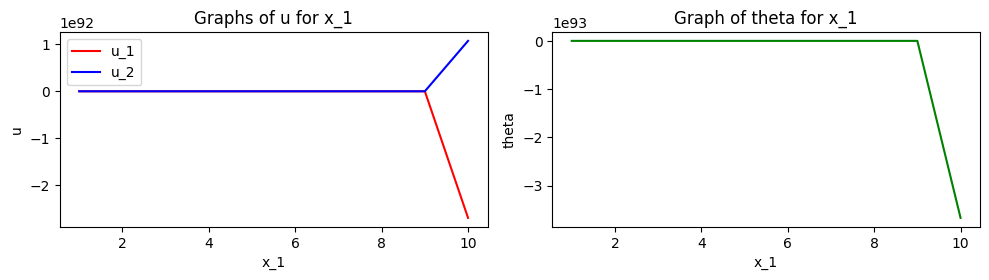

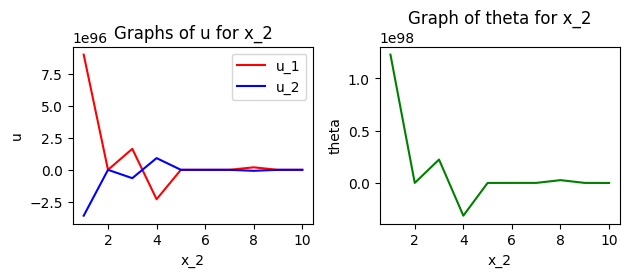

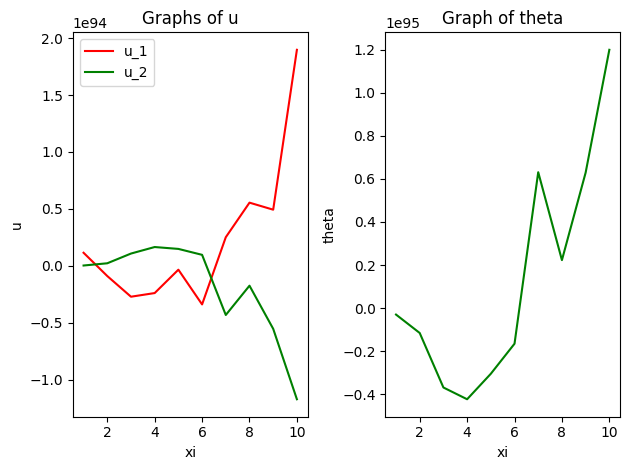

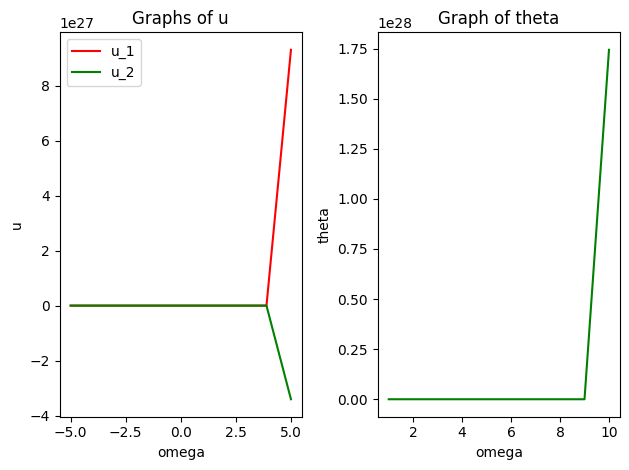

In [ ]:
plot_u_theta(1, 2, 3, 10)